In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from random import randint, uniform, gauss
C_train = 1000000
Inf = 10**6

alpha = uniform(1, Inf)
sigma = uniform(0, 1)
G = uniform(1, Inf)
X_train = []
y_train = []

for i in range(C_train):
    x0 = uniform(1, Inf)
    e = gauss(0, sigma)
    
    X_train.append([x0])
    y_train.append(x0 * alpha + e)


In [38]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
C_test = 1000

X_test = []
y_test = []
for i in range(C_test):
    x0 = uniform(1, Inf)
    e = gauss(0, sigma)
    
    X_test.append([x0])
    y_test.append(x0 * alpha + e)


In [40]:
import torch

Train = 10000
alpha_ok = uniform(1, 5)
sigma_ok = uniform(0, 1)
x_was = []
y_was = []

for i in range(Train):
    x = uniform(-10, 10)
    e = gauss(0, sigma_ok)
    y = alpha_ok * x + e
    
    x_was.append(x)
    y_was.append(y)


In [41]:
x = torch.tensor(x_was).view(-1, 1)
y = torch.tensor(y_was).view(-1, 1)
alpha = torch.tensor(1.0, requires_grad=True)
sigma_log = torch.tensor(0.0, requires_grad=True)


In [42]:
optimizer = torch.optim.Adam([alpha, sigma_log], lr=0.001)

CntIter = 5000
for iter1 in range(CntIter):
    optimizer.zero_grad()
    sigma = torch.exp(sigma_log)
    loss = ((y - (x * alpha))**2 / (2 * sigma**2) + torch.log(sigma)).mean()
    loss.backward()
    optimizer.step()
sigma = torch.exp(sigma_log)


In [43]:
print("alpha_true ", alpha_ok)
print("alpha_pred ", alpha.item(), "\n")
print("sigma_true ", sigma_ok)
print("sigma_pred ", sigma.item())

alpha_true  1.4151457452971457
alpha_pred  1.414330244064331 

sigma_true  0.638439897661334
sigma_pred  0.6329239010810852


In [44]:
alpha1 = alpha.detach().item()
sigma1 = torch.exp(sigma_log).detach().item()

C_test = 2000
x_test_was = []
y_test_was = []

for _ in range(C_test):
    x = uniform(-10, 10)
    eps = gauss(0, sigma_ok)
    y = alpha_ok * x + eps
    x_test_was.append(x)
    y_test_was.append(y)

x_test_now = np.array(x_test_was)
y_test_now = np.array(y_test_was)

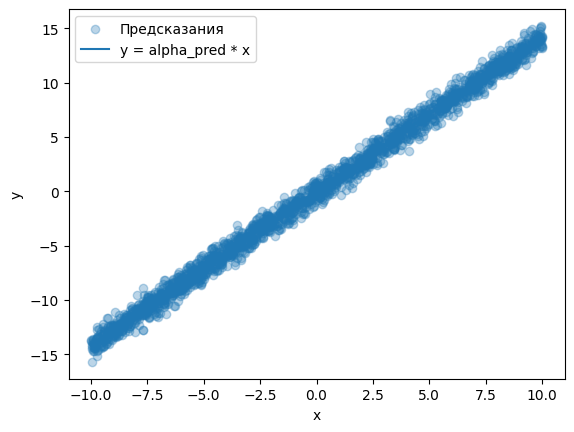

0.6329239010810852
Процент результатов предсказания в отрезке [x - σ; x + σ] 68.75
Процент результатов предсказания в отрезке [x - 2σ; x + 2σ] 95.3


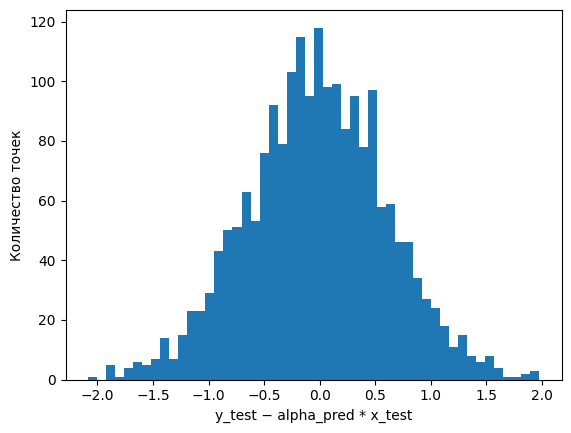

In [49]:
idx = np.argsort(x_test_now)
x_sorted = x_test_np[idx]
y_line = alpha1 * x_sorted

plt.figure()
plt.scatter(x_test_now, y_test_now, alpha=0.3, label="Предсказания")
plt.plot(x_sorted, y_line, label="y = alpha_pred * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

ans1_y = y_test_now - alpha1 * x_test_now

plt.figure()
plt.hist(ans1_y, bins=50)
plt.xlabel("y_test − alpha_pred * x_test")
print(sigma1)
all1 = 0
cnt1 = 0
cnt2 = 0
for i in range(len(ans1_y)):
    now = alpha1 * x_test_now[i]
    if now - sigma1 < y_test_now[i] < now + sigma1:
        cnt1 += 1
    if now - 2 * sigma1 < y_test_now[i] < now + 2 * sigma1:
        cnt2 += 1
    all1 += 1
print("Процент результатов предсказания в отрезке [x - σ; x + σ]", cnt1 / all1 * 100)
print("Процент результатов предсказания в отрезке [x - 2σ; x + 2σ]", cnt2 / all1 * 100)

plt.ylabel("Количество точек")
plt.show()